In [95]:
from langgraph.graph import Graph

In [96]:
from langchain_groq import ChatGroq

In [97]:
llm=ChatGroq(model="llama3-70b-8192")

In [98]:
llm.invoke("Hi").content

"Hi! It's nice to meet you. Is there something I can help you with, or would you like to chat?"

In [99]:
def function1(input):
    llm=ChatGroq(model="llama3-70b-8192")
    response=llm.invoke(input).content
    return response


In [100]:
function1("hi")

"Hi! It's nice to meet you. Is there something I can help you with, or would you like to chat?"

In [101]:
def function2(input):
    upper_string=input.upper()
    return upper_string

In [102]:
function2("hi")

'HI'

In [103]:
workflow=Graph()
workflow.add_node("LLM",function1)
workflow.add_node("upper_string",function2)

In [104]:
workflow.add_edge("LLM","upper_string")

In [105]:
workflow.set_entry_point("LLM")

In [106]:
workflow.set_finish_point("upper_string")

In [107]:
app=workflow.compile()

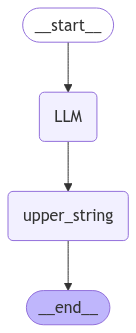

In [108]:
from IPython.display import Image,display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [109]:
app.invoke("hi")

"HI! IT'S NICE TO MEET YOU. IS THERE SOMETHING I CAN HELP YOU WITH OR WOULD YOU LIKE TO CHAT?"